In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
pd.set_option('display.max_columns', None)

In [17]:
file_path = "/content/Airbnb_Open_Data (1) (2).csv"
df = pd.read_csv(file_path, low_memory=False)

print("✅ Dataset Loaded Successfully!")
print("Shape of dataset:", df.shape)
print("\n")


✅ Dataset Loaded Successfully!
Shape of dataset: (102599, 26)




In [18]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)
print("\n")


Number of duplicate rows: 541
Shape after removing duplicates: (102058, 26)




In [19]:
print("Unique neighbourhood group names before correction:")
print(df['neighbourhood group'].unique())

df['neighbourhood group'] = df['neighbourhood group'].replace({'brookln': 'Brooklyn', 'manhatan': 'Manhattan'})

print("\nUnique neighbourhood group names after correction:")
print(df['neighbourhood group'].unique())
print("\n")

Unique neighbourhood group names before correction:
['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' nan 'Staten Island'
 'Bronx']

Unique neighbourhood group names after correction:
['Brooklyn' 'Manhattan' 'Queens' nan 'Staten Island' 'Bronx']




In [20]:
print("Missing values per column:")
print(df.isnull().sum())
print("\n")

Missing values per column:
id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            404
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       400
number of reviews                    183
last review                        15832
reviews per month                  15818
review rate number                   319
calculated host listings count       319
availability 365              

In [21]:
print("Dataset Summary:")
print(df.describe(include='all'))
print("\n")

Dataset Summary:
                  id                 NAME       host id  \
count   1.020580e+05               101808  1.020580e+05   
unique           NaN                61281           NaN   
top              NaN  Home away from home           NaN   
freq             NaN                   33           NaN   
mean    2.918438e+07                  NaN  4.926738e+10   
std     1.627173e+07                  NaN  2.853742e+10   
min     1.001254e+06                  NaN  1.236005e+08   
25%     1.509286e+07                  NaN  2.459924e+10   
50%     2.918438e+07                  NaN  4.912865e+10   
75%     4.327590e+07                  NaN  7.400619e+10   
max     5.736742e+07                  NaN  9.876313e+10   

       host_identity_verified host name neighbourhood group  \
count                  101769    101654              102029   
unique                      2     13190                   5   
top               unconfirmed   Michael           Manhattan   
freq                  

In [22]:
plt.style.use('seaborn-v0_8-darkgrid')

/tmp/ipython-input-3769360714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room type', order=df['room type'].value_counts().index, palette='cool')


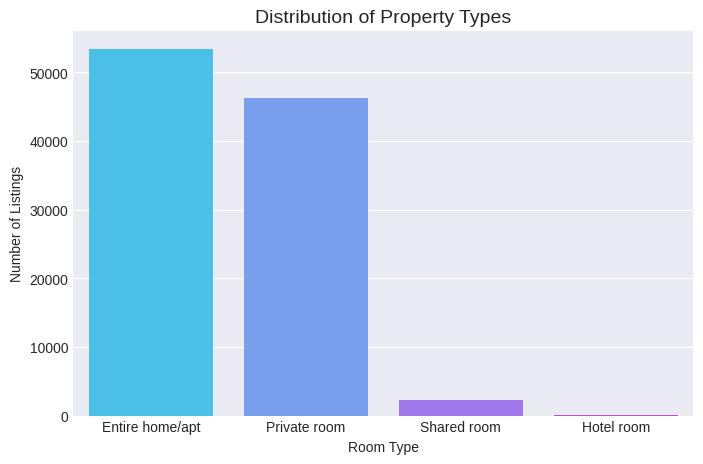

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='room type', order=df['room type'].value_counts().index, palette='cool')
plt.title("Distribution of Property Types", fontsize=14)
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.show()

/tmp/ipython-input-2225154751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood group', order=df['neighbourhood group'].value_counts().index, palette='viridis')


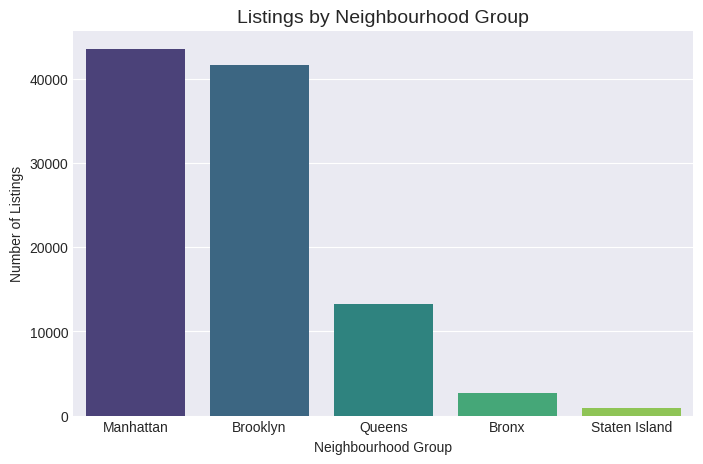

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='neighbourhood group', order=df['neighbourhood group'].value_counts().index, palette='viridis')
plt.title("Listings by Neighbourhood Group", fontsize=14)
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.show()

/tmp/ipython-input-2182582561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts.values, y=top_hosts.index, palette='coolwarm')


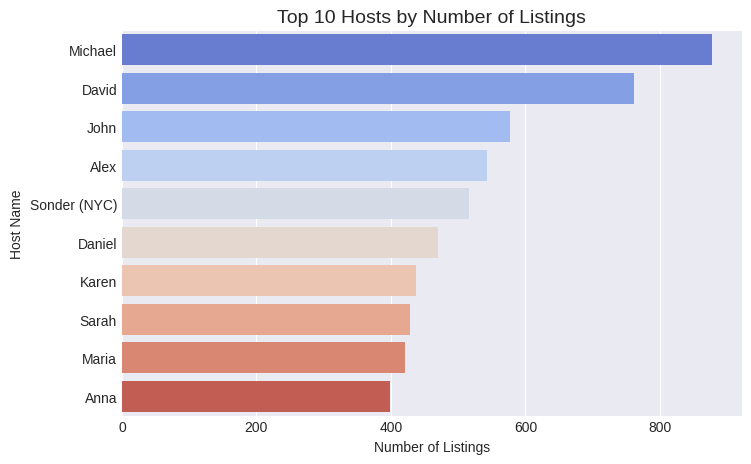

In [27]:
top_hosts = df['host name'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_hosts.values, y=top_hosts.index, palette='coolwarm')
plt.title("Top 10 Hosts by Number of Listings", fontsize=14)
plt.xlabel("Number of Listings")
plt.ylabel("Host Name")
plt.show()

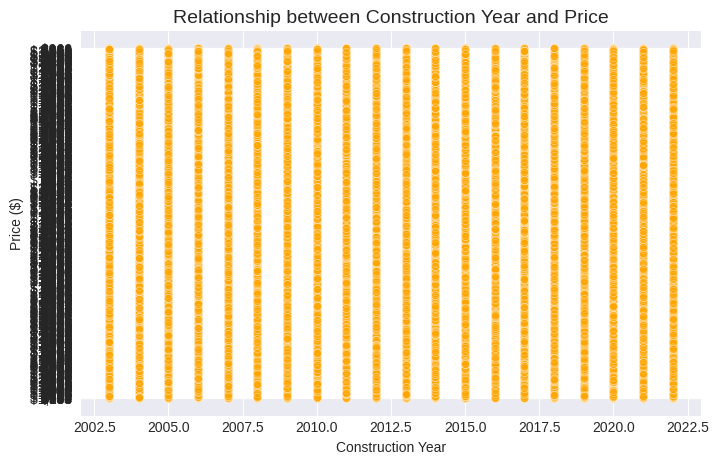

In [28]:
if 'Construction year' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df, x='Construction year', y='price', alpha=0.5, color='orange')
    plt.title("Relationship between Construction Year and Price", fontsize=14)
    plt.xlabel("Construction Year")
    plt.ylabel("Price ($)")
    plt.show()